In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bnb_df = pd.read_csv('AB2019.csv')

In [4]:
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
bnb_df.tail()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
print(f'Number of rows: {bnb_df.shape[0]}')
print(f'Number of columns: {bnb_df.shape[1]}')

Number of rows: 48895
Number of columns: 16


In [8]:
drop_list = ['id', 'host_id', 'host_name', 'last_review', 'name', 'neighbourhood']

In [9]:
bnb_df.drop(drop_list, axis=1, inplace=True)

In [10]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [11]:
bnb_df['reviews_per_month'].fillna(bnb_df['reviews_per_month'].mean(), inplace=True)

C:\Users\upput\AppData\Local\Temp\ipykernel_22672\4266755077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bnb_df['reviews_per_month'].fillna(bnb_df['reviews_per_month'].mean(), inplace=True)


In [13]:
bnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.373221,1.497775,0.01000,0.28000,1.22000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [14]:
bnb_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

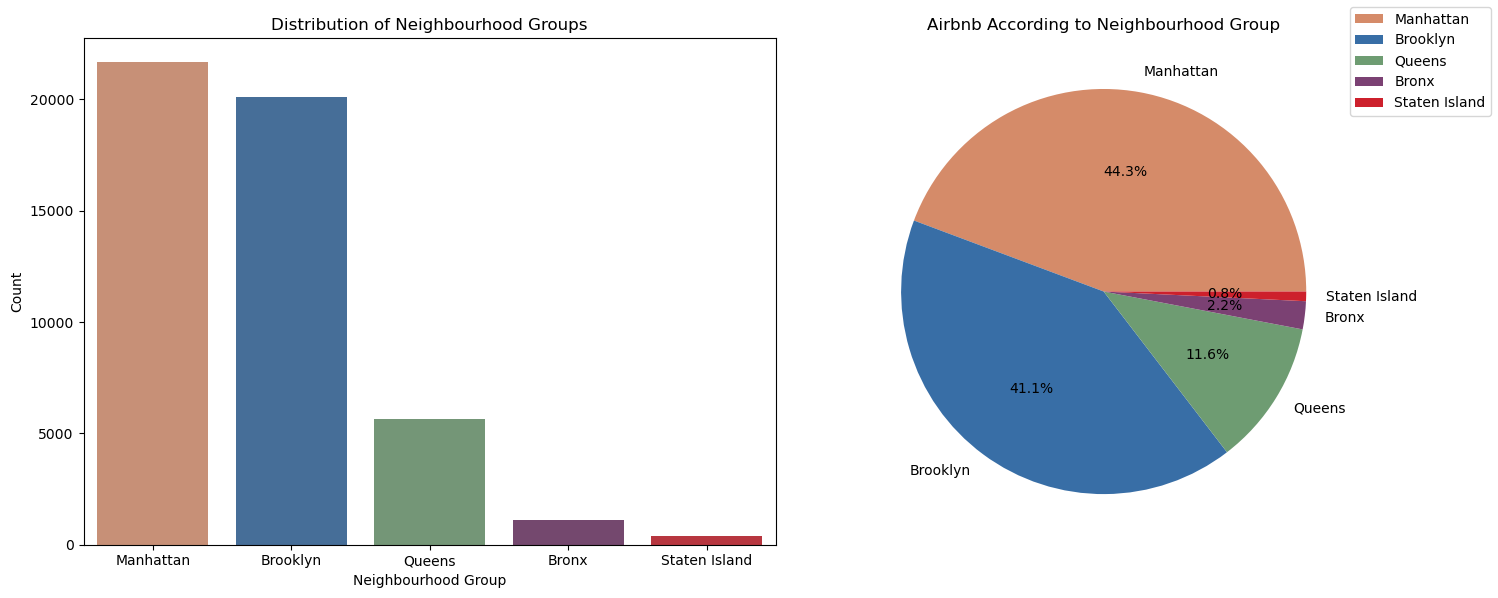

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Define labels, colors, explode settings, and sizes for neighbourhood groups
labels = bnb_df.neighbourhood_group.value_counts().index
colors = ['#D58B69','#386EA6','#6E9C72','#7B4173','#CD202C']
explode = [0,0,0,0,0]
sizes = bnb_df.neighbourhood_group.value_counts().values

# Count plot for neighbourhood groups
sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')
ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')


# Add legend and display plot
fig.legend()
plt.tight_layout()
plt.show()

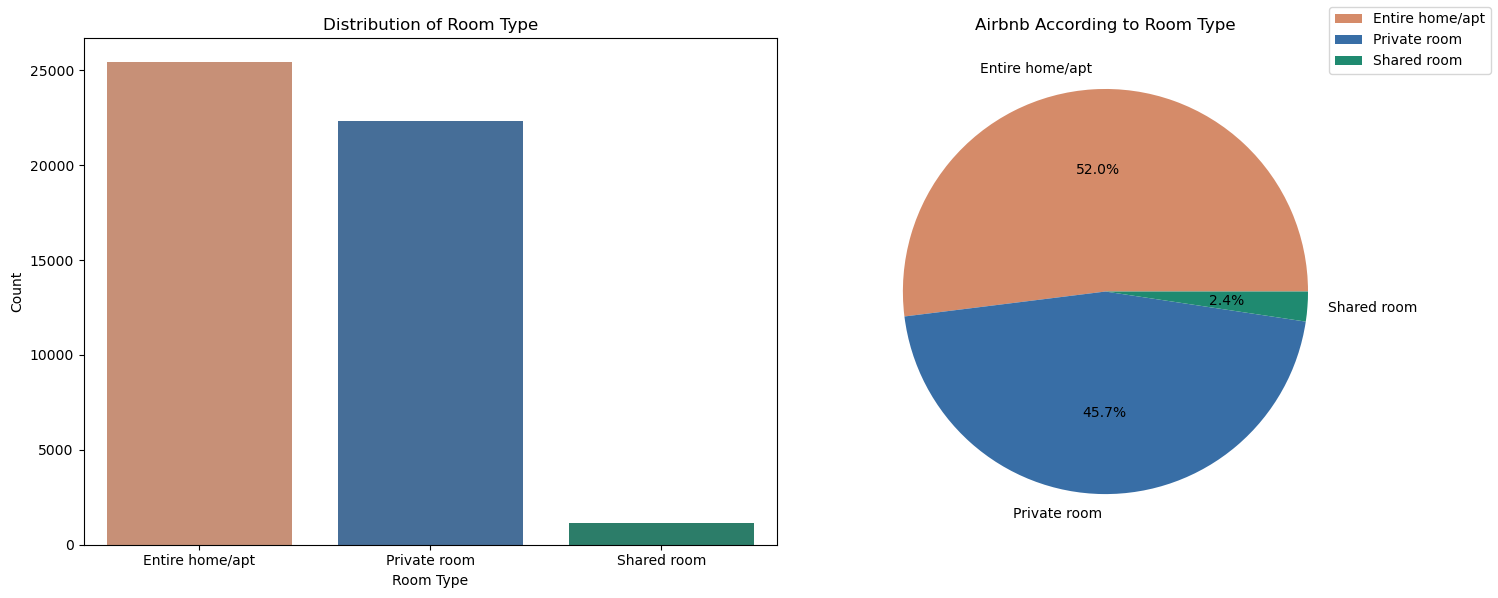

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Define labels, colors, explode settings, and sizes for room type
labels = bnb_df.room_type.value_counts().index
colors = ['#D58B69','#386EA6','#1F8A70']
explode = [0,0,0]
sizes = bnb_df.room_type.value_counts().values

# Count plot for room type
sns.countplot(x='room_type', hue='room_type', order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Room Type')
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Count')
ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Room Type')

# Add legend and display plot
fig.legend()
plt.tight_layout()
plt.show()

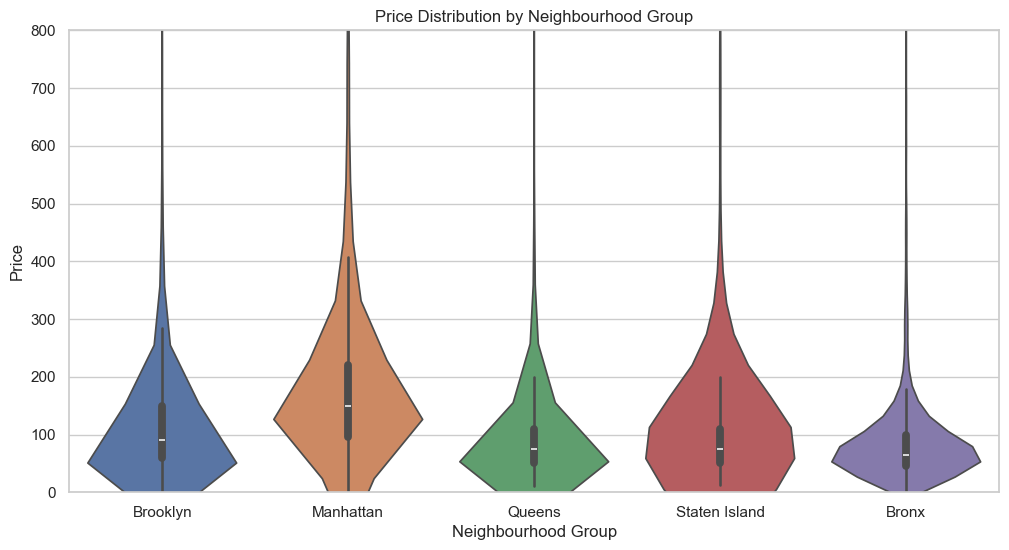

In [17]:
# Set Seaborn style to whitegrid
sns.set(style="whitegrid")

# Create a violin plot for price distribution by neighbourhood group
plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=bnb_df, hue='neighbourhood_group')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Set y-axis limit to show the results better
plt.ylim((0,800))
plt.show()

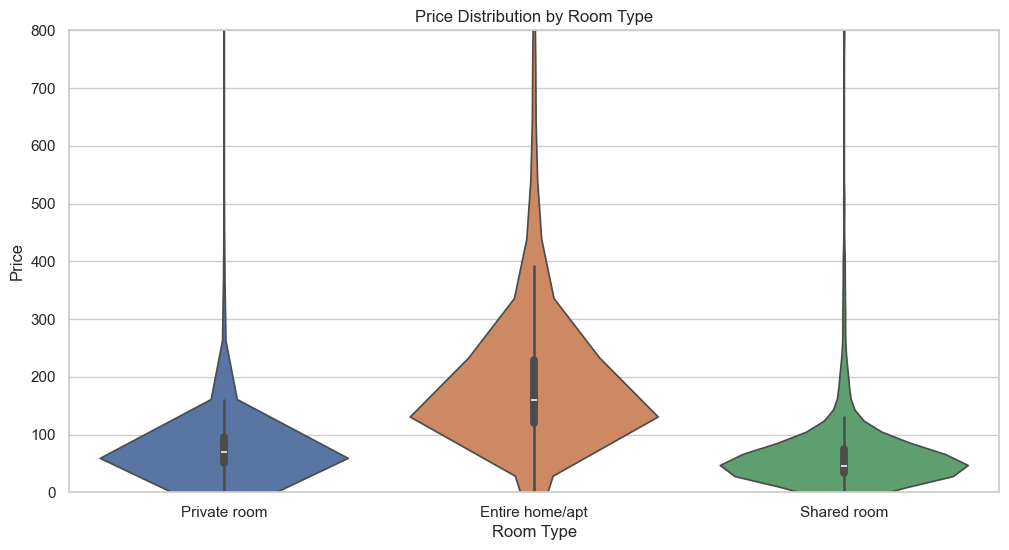

In [18]:
# Create a violin plot for price distribution by room type
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='price', data=bnb_df, hue='room_type')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type') 
plt.ylabel('Price')

# Set y-axis limit to show the results better
plt.ylim((0,800))
plt.show()

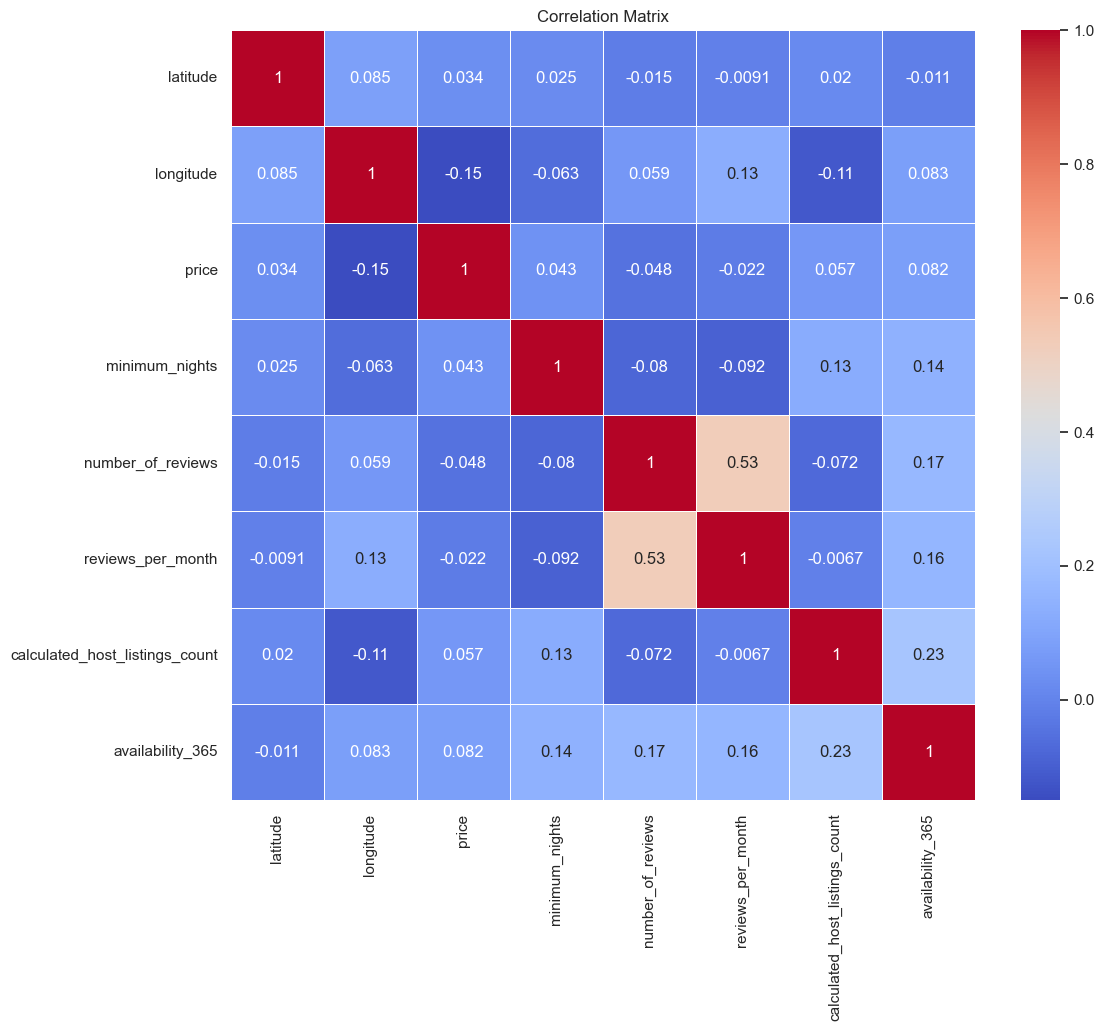

In [19]:
plt.figure(figsize=(12, 10))
corr_matrix = bnb_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

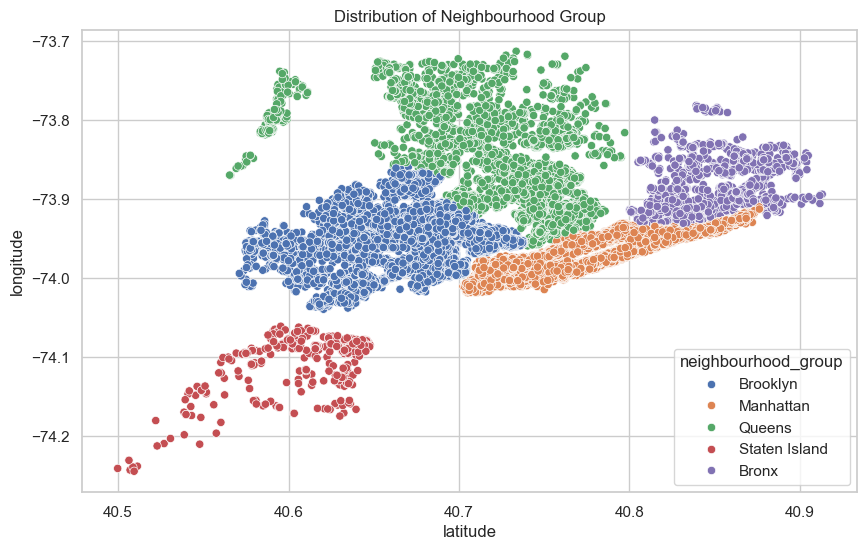

In [20]:
# Scatter plot showing the distribution of Airbnb listings colored by neighbourhood group
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')

plt.show()

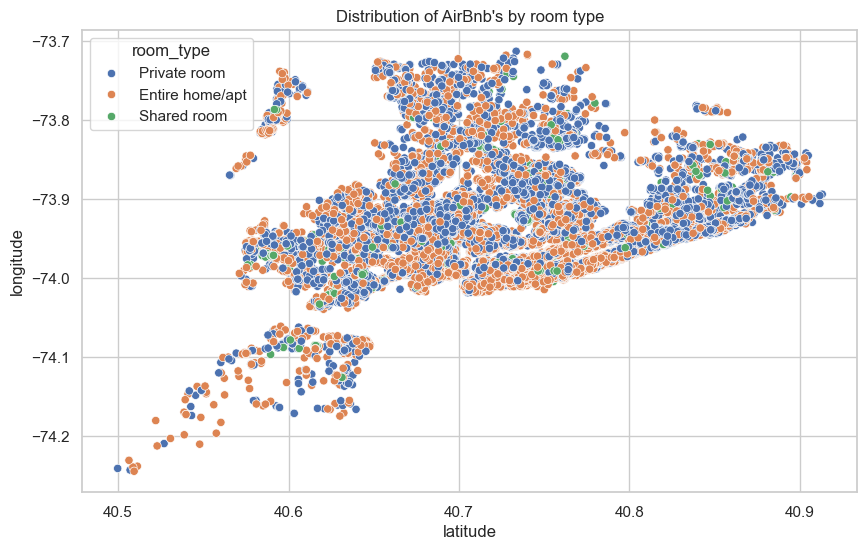

In [22]:
# Scatter plot showing the distribution of Airbnb listings colored by room type
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'room_type')
plt.title("Distribution of AirBnb's by room type")

plt.show()

<Figure size 1000x1000 with 0 Axes>

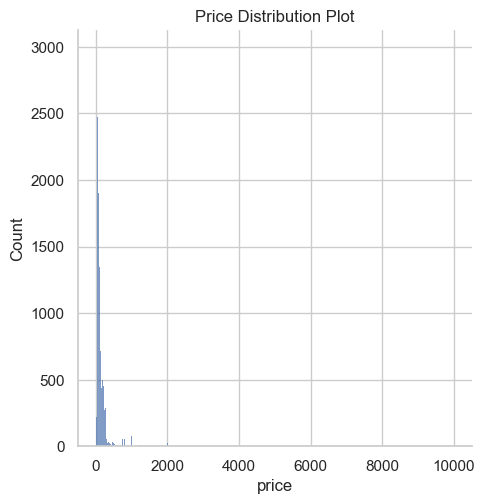

In [23]:
# Create and display the distribution of prices
plt.figure(figsize=(10,10))
sns.displot(bnb_df['price'])
plt.title("Price Distribution Plot")
plt.show()

<Figure size 1000x600 with 0 Axes>

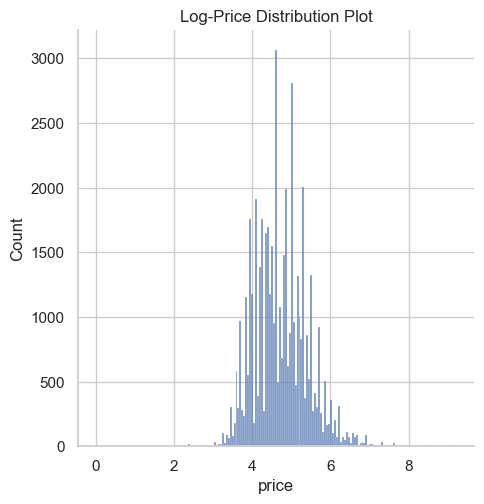

In [24]:
# Create and display the distribution of log-tranformed prices
plt.figure(figsize=(10,6))
sns.displot(np.log1p(bnb_df['price']))
plt.title("Log-Price Distribution Plot")
plt.show()

<Figure size 1000x600 with 0 Axes>

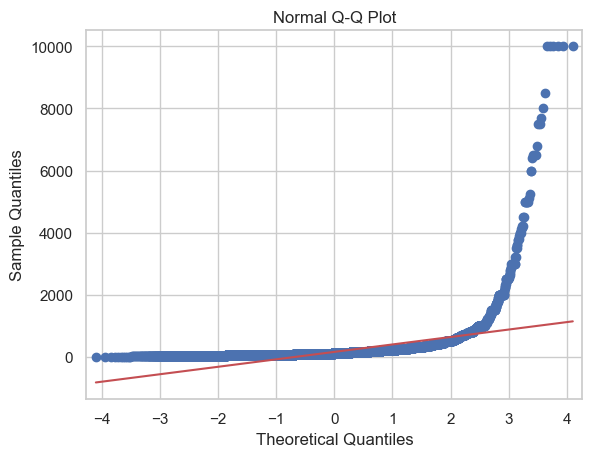

In [25]:
import statsmodels.api as sm

# Generate a Q-Q plot for the price
plt.figure(figsize=(10, 6))
sm.qqplot(bnb_df['price'], line='s')
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


<Figure size 1000x600 with 0 Axes>

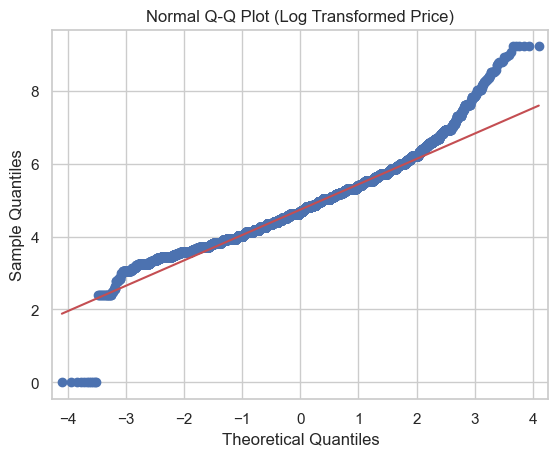

In [28]:
# Generate a Q-Q plot for the log-transformed price
plt.figure(figsize=(10, 6))
sm.qqplot(np.log1p(bnb_df['price']), line='s')
plt.title('Normal Q-Q Plot (Log Transformed Price)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [27]:
bnb_df = pd.get_dummies(bnb_df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [29]:
# Display the dataset to see the changes
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,True,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.380000,2,355,False,True,False,False,False,False
2,40.80902,-73.94190,150,3,0,1.373221,1,365,False,True,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.640000,1,194,True,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.100000,1,0,False,True,False,False,False,False


In [30]:
for col in bnb_df.select_dtypes(include=['bool']).columns:
    bnb_df[col] = bnb_df[col].astype(int)

In [31]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.380000,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.640000,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,0,1,0,0,0,0


In [32]:
# Print the max value of the price, minimum nights and number of reviews
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

10000 1250 629


In [33]:
# Create a function to calculate the outlier thresholds
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1) 
    quartile3 = dataframe[col_name].quantile(q3)

    # Calculate the interquartile range
    interquantile_range = quartile3 - quartile1

    # Define the upper and lower limits for detecting outliers
    up_limit = quartile3 + 1.5 * interquantile_range 
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [34]:
# create a function to check if there are outliers in a column of a dataframe
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [35]:
# Function to replace the outliers with threshold values
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [36]:
# List of numerical feature
numerical_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room']

In [37]:
for col in numerical_features:
   if check_outlier(bnb_df, col):
      replace_with_thresholds(bnb_df, col)

C:\Users\upput\AppData\Local\Temp\ipykernel_22672\1361679632.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1123.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [38]:
# Print the max value of the price, minimum nights and number of reviews to check the results
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

1952.5 111 535


In [39]:
bnb_df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149.0,1,9,0.210000,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225.0,1,45,0.380000,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150.0,3,0,1.373221,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89.0,1,270,4.640000,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80.0,10,9,0.100000,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70.0,2,0,1.373221,2,9,1,0,0,0,1,0
48891,40.70184,-73.93317,40.0,4,0,1.373221,2,36,1,0,0,0,1,0
48892,40.81475,-73.94867,115.0,10,0,1.373221,1,27,0,1,0,0,0,0
48893,40.75751,-73.99112,55.0,1,0,1.373221,6,2,0,1,0,0,0,1


In [41]:
# Create a new column with the log-tranformed price
bnb_df['log_price'] = np.log1p(bnb_df['price'])

In [42]:
# Drop the price column
bnb_df.drop('price', axis= 1, inplace=True)

In [43]:
# create sub-df
bnb_df_x = bnb_df.drop('log_price', axis = 1)
bnb_df_y = bnb_df['log_price']